## ANALISIS DAMPAK KEPADATAN KENDARAAN TERHADAP POLUSI UDARA WILAYAH KOTA JAKARTA

Kelompok Transportasi

1. Muhammad Azriel Saktiawan
2. Bilal
3. Annisa Nur Fadillah
4. Sri Ayu Ningsih

## Import Library

In [226]:
import requests
from bs4 import BeautifulSoup
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

- Data yang kita ambil itu berjumlah 4 (2 dari bps dan 2 dari databooks)
- 2 data yang kami scraping dari website dan 2 data yang kami scraping manual

In [227]:
# URL halaman yang akan di-scrape
url = 'https://jakarta.bps.go.id/indicator/12/1270/1/jumlah-penduduk-menurut-kabupaten-kota-di-provinsi-dki-jakarta-.html'

# Mengirimkan permintaan GET ke halaman web
response = requests.get(url)

# Mengecek apakah permintaan berhasil
if response.status_code == 200:
    # Menginisialisasi BeautifulSoup untuk menguraikan halaman web
    soup = BeautifulSoup(response.text, 'html.parser')

    # Mencari tabel dengan atribut class 'table-responsive'
    target_table = soup.find('div', {'id': 'isi-tabel', 'class': 'table-responsive'})

    if target_table is not None:
        # Menemukan semua baris dalam tabel
        rows = target_table.find_all('tr')

        data = []
        # Mengambil data dari setiap baris
        for row in rows:
            # Mengambil semua sel dalam setiap baris
            cells = row.find_all(['th', 'td'])
            data.append([cell.get_text(strip=True) for cell in cells])

        # Buat DataFrame dari data
        pdf = pd.DataFrame(data[1:], columns=['Kab/Kota', '2020', '2021', '2022'])

        pdf = pdf[:-4]  # Menghapus baris terakhir hingga kedua terakhir


        display(pdf)

,Kab/Kota,2020,2021,2022
0,2020,2021,2022,None
1,Kep Seribu,27749,28240,28925
2,Jakarta Selatan,2226812,2233855,2244623
3,Jakarta Timur,3037139,3056300,3083883
4,Jakarta Pusat,1056896,1066460,1079995
5,Jakarta Barat,2434511,2440073,2448975
6,Jakarta Utara,1778981,1784753,1793550
7,DKI Jakarta,10562088,10609681,10679951


In [228]:
# URL halaman yang akan di-scrape
url = 'https://jakarta.bps.go.id/indicator/17/786/1/jumlah-kendaraan-bermotor-menurut-jenis-kendaraan-unit-di-provinsi-dki-jakarta.html'

# Mengirimkan permintaan GET ke halaman web
response = requests.get(url)

# Mengecek apakah permintaan berhasil
if response.status_code == 200:
    # Menginisialisasi BeautifulSoup untuk menguraikan halaman web
    soup = BeautifulSoup(response.text, 'html.parser')

    # Mencari tabel dengan atribut class 'table-responsive'
    target_table = soup.find('div', {'id': 'isi-tabel', 'class': 'table-responsive'})

    if target_table is not None:
        # Menemukan semua baris dalam tabel
        rows = target_table.find_all('tr')

        data = []
        # Mengambil data dari setiap baris
        for row in rows:
            # Mengambil semua sel dalam setiap baris
            cells = row.find_all(['th', 'td'])
            data.append([cell.get_text(strip=True) for cell in cells])

        # Buat DataFrame dari data
        kdf = pd.DataFrame(data[1:], columns=['jenis kendaraan', '2020', '2021', '2022'])

        kdf = kdf[:-4]  # Menghapus baris terakhir hingga kedua terakhir


        display(kdf)

,jenis kendaraan,2020,2021,2022
0,2020,2021,2022,None
1,Mobil Penumpang,3365467,3544491,3766059
2,Bus,35266,36339,37180
3,Truk,679708,713059,748395
4,Sepeda Motor,16141380,16711638,17304447
5,Jumlah,20221821,21005527,21856081


In [229]:
idf = pd.read_csv('D:/My Data ALL/Downloads/kelompok 4/data_ispa.csv')

In [230]:
idf.head(6)

,No,Bulan,Kasus
0,1,Januari,102.609
1,2,Februari,104.638
2,3,Maret,119.734
3,4,April,109.705
4,5,Mei,99.130
5,6,Juni,102.475


In [231]:
udf = pd.read_csv('D:/My Data ALL/Downloads/kelompok 4/udara.csv')

In [232]:
udf.head(10)

,No,Kab/Kota,Nilai
0,1,DKI Jakarta,129
1,2,Banten,112
2,3,Jawa Barat,107
3,4,Jawa Timur,78
4,5,Kalimantan Tengah,76
5,6,Sumatera Utara,73
6,7,Kep. Riau,71
7,8,Jawa Tengah,70
8,9,Kalimantan Tengah,69
9,10,Nusa Tenggara Barat,65


# Data Cleaning

In [233]:
# Misalkan Anda ingin menghapus baris dengan indeks 2 (indeks dimulai dari 0)
indeks_yang_akan_dihapus1 = 0

# Menggunakan metode drop() untuk menghapus baris
pdf = pdf.drop(indeks_yang_akan_dihapus1)

# Setelah menjalankan kode di atas, baris dengan indeks 2 akan dihapus dari DataFrame 'df'

indeks_yang_akan_dihapus2 = 0
kdf = kdf.drop(indeks_yang_akan_dihapus2)

In [234]:
pdf.head()

,Kab/Kota,2020,2021,2022
1,Kep Seribu,27749,28240,28925
2,Jakarta Selatan,2226812,2233855,2244623
3,Jakarta Timur,3037139,3056300,3083883
4,Jakarta Pusat,1056896,1066460,1079995
5,Jakarta Barat,2434511,2440073,2448975


In [235]:
kdf.head()

,jenis kendaraan,2020,2021,2022
1,Mobil Penumpang,3365467,3544491,3766059
2,Bus,35266,36339,37180
3,Truk,679708,713059,748395
4,Sepeda Motor,16141380,16711638,17304447
5,Jumlah,20221821,21005527,21856081


# Data Visualisasi

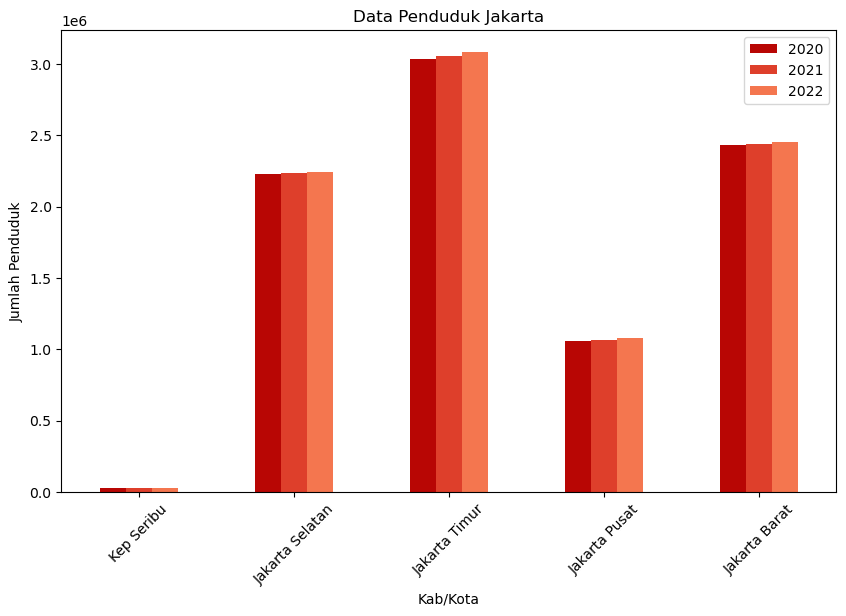

In [237]:
# Data
data = {
    'Kab/Kota': ['Kep Seribu', 'Jakarta Selatan', 'Jakarta Timur', 'Jakarta Pusat', 'Jakarta Barat'],
    '2020': [27749, 2226812, 3037139, 1056896, 2434511],
    '2021': [28240, 2233855, 3056300, 1066460, 2440073],
    '2022': [28925, 2244623, 3083883, 1079995, 2448975]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Mengatur kolom 'Kab/Kota' sebagai indeks
df.set_index('Kab/Kota', inplace=True)

# Membuat diagram batang
df.plot(kind='bar', figsize=(10, 6))
plt.title('Data Penduduk Jakarta')
plt.xlabel('Kab/Kota')
plt.ylabel('Jumlah Penduduk')
plt.xticks(rotation=45)

plt.show()


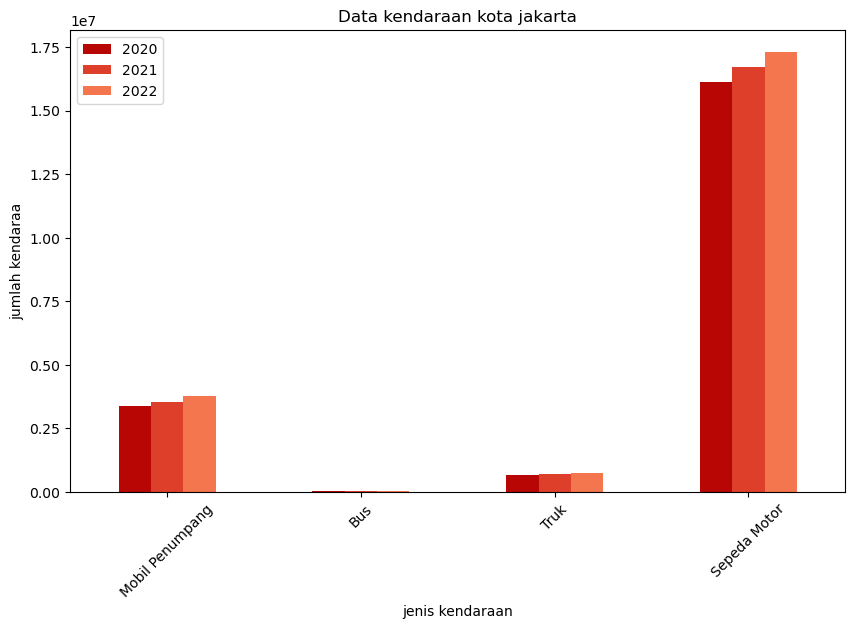

In [238]:
# Data
data = {
    'jenis kendaraan': ['Mobil Penumpang', 'Bus', 'Truk', 'Sepeda Motor'],
    '2020': [3365467, 35266, 679708, 16141380],
    '2021': [3544491, 36339, 713059, 16711638],
    '2022': [3766059, 37180, 748395, 17304447]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Mengatur kolom 'Kab/Kota' sebagai indeks
df.set_index('jenis kendaraan', inplace=True)

# Membuat diagram batang
df.plot(kind='bar', figsize=(10, 6))
plt.title('Data kendaraan kota jakarta')
plt.xlabel('jenis kendaraan')
plt.ylabel('jumlah kendaraa')
plt.xticks(rotation=45)

plt.show()


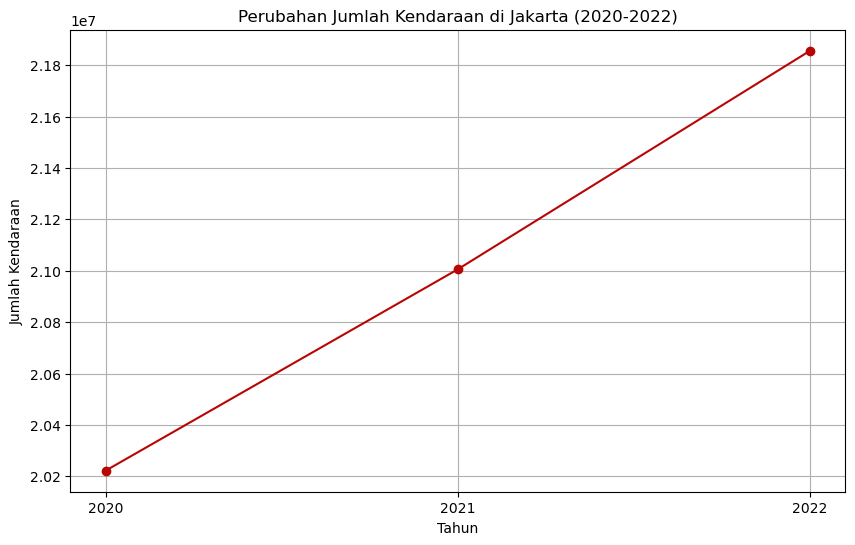

In [240]:
import matplotlib.pyplot as plt

tahun = ['2020', '2021', '2022']
jumlah = [20221821, 21005527, 21856081]

# Membuat diagram garis dengan satu seri data
plt.figure(figsize=(10, 6))
plt.plot(tahun, jumlah, marker='o')

plt.title('Perubahan Jumlah Kendaraan di Jakarta (2020-2022)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kendaraan')

plt.grid()

plt.show()


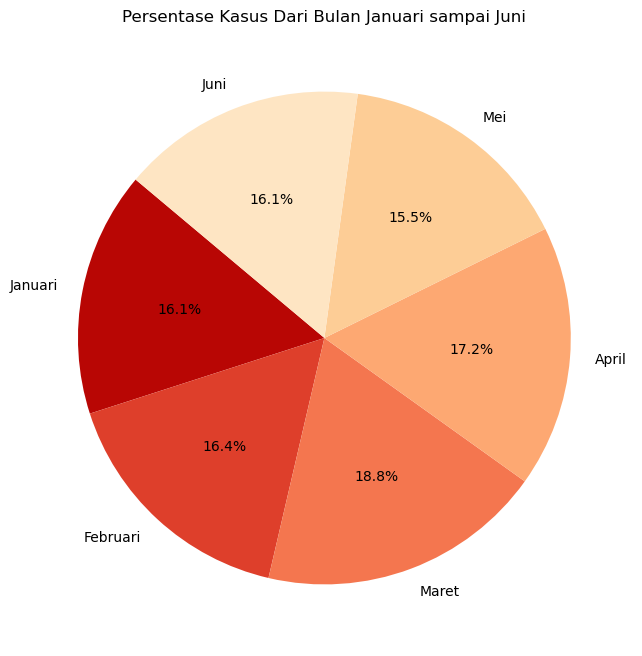

In [241]:
import matplotlib.pyplot as plt

# Data
bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni']
kasus = [102609, 104638, 119734, 109705, 99130, 102475]

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(kasus, labels=bulan, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Kasus Dari Bulan Januari sampai Juni')

plt.show()


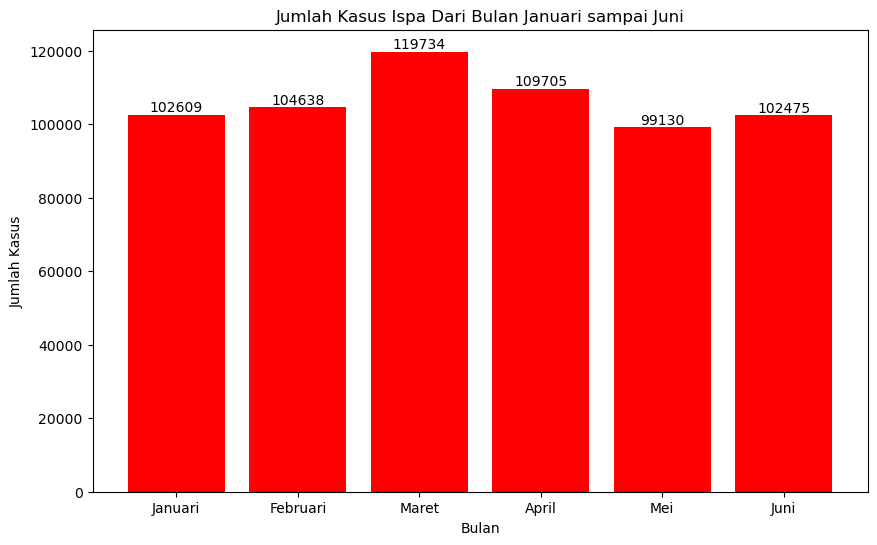

In [242]:
import matplotlib.pyplot as plt

# Data
bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni']
kasus = [102609, 104638, 119734, 109705, 99130, 102475]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(bulan, kasus, color='r')

# Menambahkan nilai kasus di atas setiap batang
for i, v in enumerate(kasus):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Jumlah Kasus Ispa Dari Bulan Januari sampai Juni')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kasus')

plt.show()


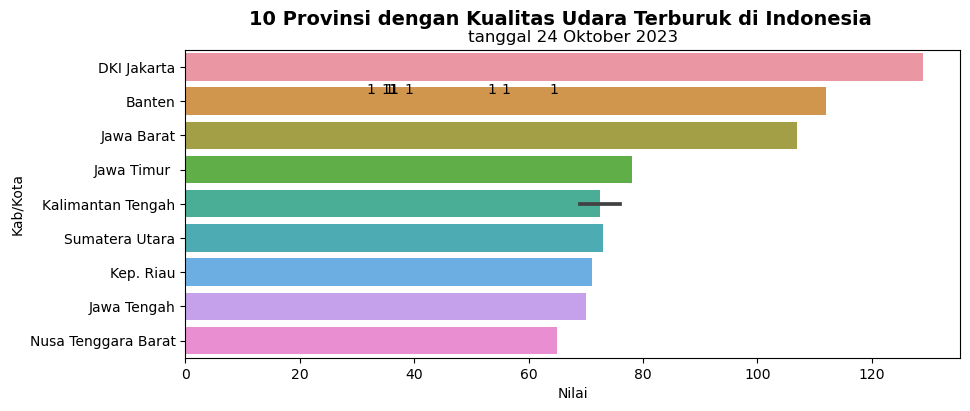

In [251]:
fig, ax = plt.subplots(1, figsize=(10, 4))
fig.suptitle("10 Provinsi dengan Kualitas Udara Terburuk di Indonesia", weight='bold', fontsize=14)

sns.set_palette('OrRd_r')  # Mengatur warna palette

sns.barplot(
    y='Kab/Kota',
    x='Nilai',
    data=udf.sort_values('Nilai', ascending=False).head(10),
    ax=ax  # Menentukan axes yang akan digunakan
)

ax.set_title("tanggal 24 Oktober 2023")

# Menambahkan label pada bar chart
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}', ha='center')

plt.show()
